# expand_limits()

In [60]:
head(BOD)

,Time,demand
,<dbl>,<dbl>
1,1,8.3
2,2,10.3
3,3,19.0
4,4,16.0
5,5,15.6
6,7,19.8


In [62]:
p = ggplot(BOD, aes(x = Time, y = demand)) + 
    geom_line()

In [63]:
ggsave('默认y轴范围.png', dpi = 100, plot = p, width = 6, height = 4)

In [67]:
p = ggplot(BOD, aes(x = Time, y = demand)) + 
    geom_line() + 
    expand_limits(y = 0)

In [68]:
ggsave('默认y轴范围2.png', dpi = 100, plot = p, width = 6, height = 4)

# facet_grid()

In [70]:
library(gcookbook)

In [71]:
head(gcookbook::tophitters2001)

,id,first,last,name,year,stint,team,lg,g,ab,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,avg
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,walkela01,Larry,Walker,Larry Walker,2001,1,COL,NL,142,497,...,14,5,82,103,6,14,0,8,9,0.3501
2,suzukic01,Ichiro,Suzuki,Ichiro Suzuki,2001,1,SEA,AL,157,692,...,56,14,30,53,10,8,4,4,3,0.3497
3,giambja01,Jason,Giambi,Jason Giambi,2001,1,OAK,AL,154,520,...,2,0,129,83,24,13,0,9,17,0.3423
4,alomaro01,Roberto,Alomar,Roberto Alomar,2001,1,CLE,AL,157,575,...,30,6,80,71,5,4,9,9,9,0.3357
5,heltoto01,Todd,Helton,Todd Helton,2001,1,COL,NL,159,587,...,7,5,98,104,15,5,1,5,14,0.3356
6,aloumo01,Moises,Alou,Moises Alou,2001,1,HOU,NL,136,513,...,5,1,57,57,14,3,0,8,18,0.3314


In [87]:
tophit = tophitters2001[(tophitters2001$team == 'HOU') | (tophitters2001$team == 'SEA'),]
head(tophit)

,id,first,last,name,year,stint,team,lg,g,ab,...,sb,cs,bb,so,ibb,hbp,sh,sf,gidp,avg
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
2,suzukic01,Ichiro,Suzuki,Ichiro Suzuki,2001,1,SEA,AL,157,692,...,56,14,30,53,10,8,4,4,3,0.3497
6,aloumo01,Moises,Alou,Moises Alou,2001,1,HOU,NL,136,513,...,5,1,57,57,14,3,0,8,18,0.3314
7,berkmla01,Lance,Berkman,Lance Berkman,2001,1,HOU,NL,156,577,...,7,9,92,121,5,13,0,6,8,0.3310
8,boonebr01,Bret,Boone,Bret Boone,2001,1,SEA,AL,158,623,...,5,5,40,110,5,9,5,13,11,0.3307
32,martied01,Edgar,Martinez,Edgar Martinez,2001,1,SEA,AL,132,470,...,4,1,93,90,9,9,0,9,11,0.3064
41,olerujo01,John,Olerud,John Olerud,2001,1,SEA,AL,159,572,...,3,1,94,70,19,5,1,7,21,0.3024


In [76]:
head(tophitters2001$stint)

[1] 1 1 1 1 1 1

In [89]:
p = ggplot(tophit, aes(x = avg, y = name)) + 
    geom_segment(aes(yend = name), xend = 0, colour = 'grey50') + 
    geom_point(size = 3, aes(colour = lg)) + 
    scale_color_brewer(palette = 'Set1', limits = c('NL', 'AL'), guide = FALSE) + 
    theme_bw() + 
    theme(panel.grid.major.y = element_blank()) + 
    facet_grid(lg~., scales = 'free_y', space = 'free_y')

In [90]:
ggsave('分面条形图.png', dpi = 100, plot = p, width = 6, height = 4)

In [91]:
library(MASS)
head(birthwt)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
85,0,19,182,2,0,0,0,1,0,2523
86,0,33,155,3,0,0,0,0,3,2551
87,0,20,105,1,1,0,0,0,1,2557
88,0,21,108,1,1,0,0,1,2,2594
89,0,18,107,1,1,0,0,1,0,2600
91,0,21,124,3,0,0,0,0,0,2622


In [93]:
p = ggplot(birthwt, aes(x = bwt)) + 
    geom_histogram(fill = 'white', colour = 'black') + 
    facet_grid(smoke ~.)

In [94]:
ggsave('分面直方图.png', dpi = 100, plot = p, width = 6, height = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



In [97]:
birthwt1 = birthwt
birthwt1$smoke = factor(birthwt1$smoke)

In [98]:
levels(birthwt1$smoke)

[1] "0" "1"

In [99]:
library(plyr)
birthwt1$smoke = revalue(birthwt1$smoke, c('0' = 'No Smoke', '1' = 'Smoke'))

In [101]:
p = ggplot(birthwt1, aes(x = bwt)) + 
    geom_histogram(fill = 'white', colour = 'black') + 
    facet_grid(smoke~.)

In [102]:
ggsave('分面直方图2.png', dpi = 100, plot = p, width = 6, height = 4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



# geom_area()

In [ ]:
install.packages('gcookbook')

In [1]:
library(ggplot2)   ## 用于绘图
library(gcookbook) ## 使用当中的数据
library(plyr)

In [3]:
uspopage_prop = ddply(uspopage, "Year", transform, Percent = Thousands / sum(Thousands) * 100 )

In [2]:
head(gcookbook::uspopage)

,Year,AgeGroup,Thousands
,<int>,<fct>,<int>
1,1900,<5,9181
2,1900,5-14,16966
3,1900,15-24,14951
4,1900,25-34,12161
5,1900,35-44,9273
6,1900,45-54,6437


In [6]:
head(uspopage_prop)

,Year,AgeGroup,Thousands,Percent
,<int>,<fct>,<int>,<dbl>
1,1900,<5,9181,12.065340
2,1900,5-14,16966,22.296107
3,1900,15-24,14951,19.648067
4,1900,25-34,12161,15.981549
5,1900,35-44,9273,12.186243
6,1900,45-54,6437,8.459274


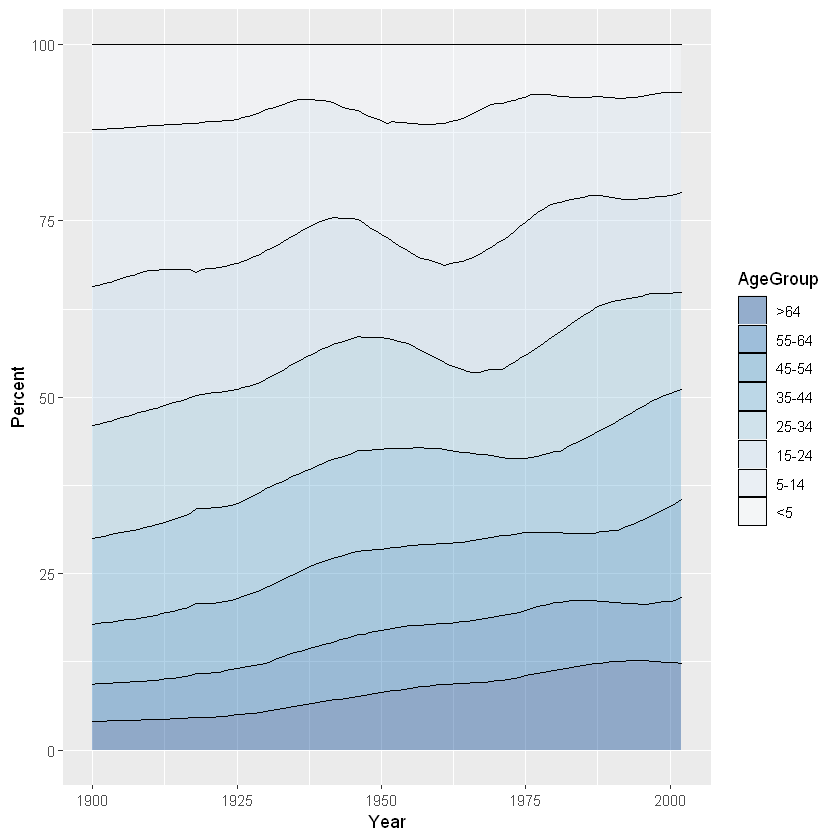

In [17]:
p  = ggplot(uspopage_prop, aes(x = Year, y = Percent, fill = AgeGroup)) + 
        geom_area(colour = 'black', size = .2, alpha = .4) + 
        scale_fill_brewer(palette = "Blues", breaks = rev(levels(uspopage$AgeGroup)))
p 

In [18]:
png('百分比堆积面积图.png', width = , height = 5)
dev.off()

png 
  2

In [19]:
ggsave('百分比堆积面积图.png', dpi = 100, plot = p, width = 6, height = 4)

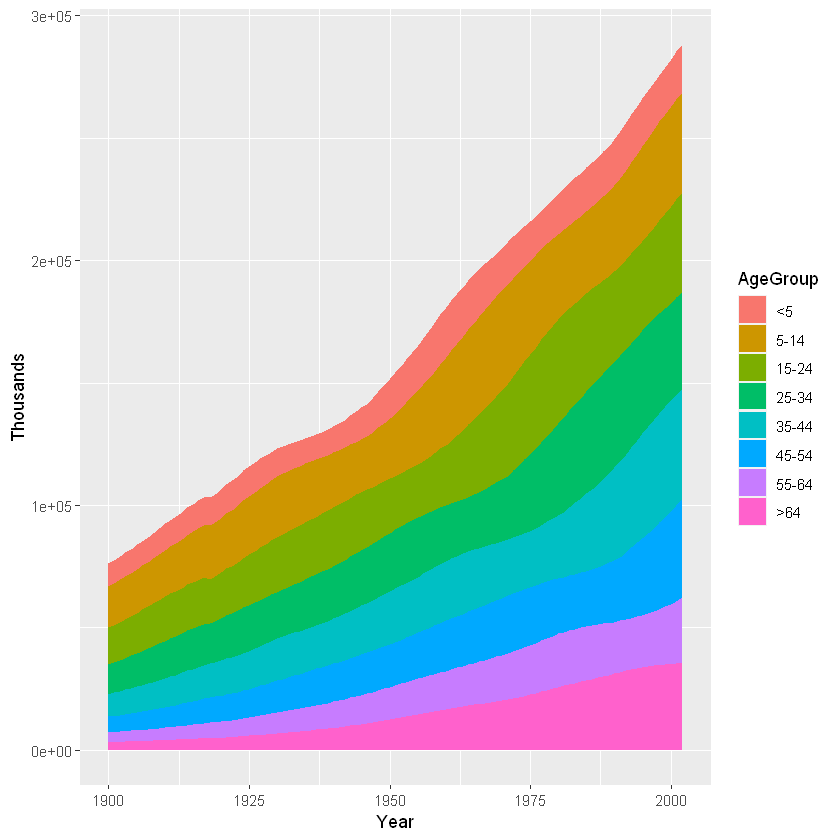

In [20]:
library(gcookbook)

p = ggplot(uspopage, aes(x = Year, y = Thousands, fill = AgeGroup)) + 
        geom_area()
p 

In [21]:
ggsave('堆积面积图.png', dpi = 100, plot = p, width = 6, height = 4)

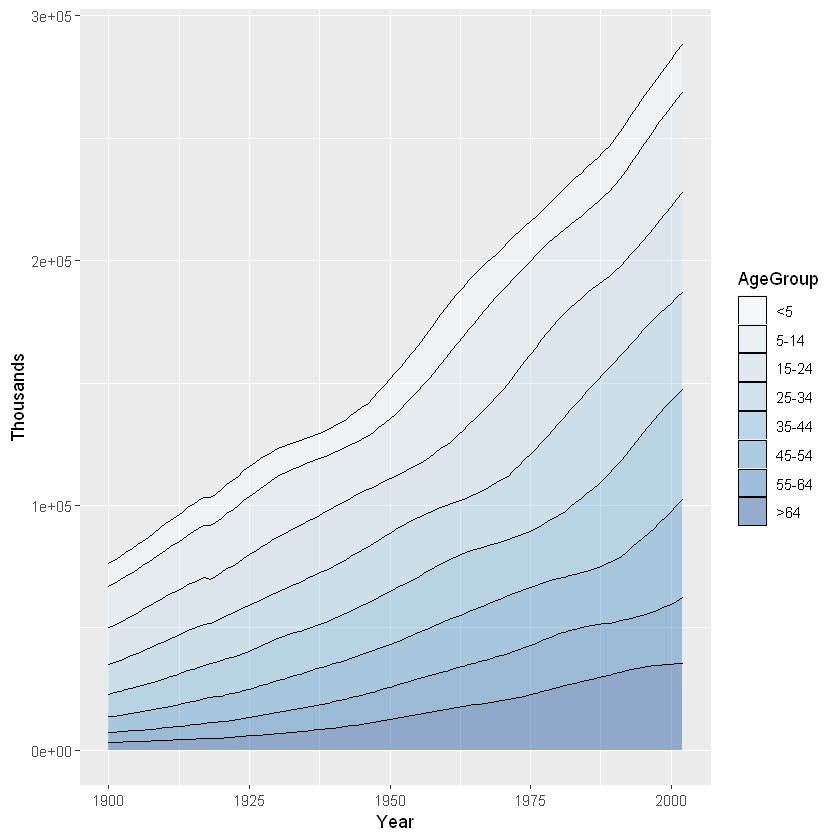

In [22]:
library(plyr)
library(gcookbook)
library(ggplot2)

p = ggplot(uspopage, aes(x = Year, y = Thousands, fill = AgeGroup, order = desc(AgeGroup))) + 
        geom_area(colour = 'black', size = .2, alpha = .4) + 
        scale_fill_brewer(palette = 'Blues')
p 
## aes中order确定图例的顺序

In [25]:
ggsave('堆积面积图2.png', dpi = 100, plot = p, width = 6, height = 4)

In [28]:
sunspotyear = data.frame(Year = as.numeric(time(sunspot.year)),
                        Sunspots = as.numeric(sunspot.year))
p = ggplot(sunspotyear, aes(x = Year, y = Sunspots)) + geom_area()

In [29]:
ggsave('面积图.png', dpi = 100, plot = p, width = 6, height = 4)

In [30]:
sunspotyear = data.frame(Year = as.numeric(time(sunspot.year)),
                        Sunspots = as.numeric(sunspot.year))
p = ggplot(sunspotyear, aes(x = Year, y = Sunspots)) + 
    geom_area(colour = 'black', fill = 'blue', alpha = .2)

In [31]:
ggsave('面积图2.png', dpi = 100, plot = p, width = 6, height = 4)

In [33]:
p = ggplot(sunspotyear, aes(x = Year, y = Sunspots)) + 
    geom_area(fill = 'blue', alpha = .2) + ## 先绘制不带边框线的面积图
    geom_line() ## 再绘制轨迹

In [34]:
ggsave('面积图3.png', dpi = 100, plot = p, width = 6, height = 4)

# geom_bar()

In [103]:
library(gcookbook)

head(uspopchange)

,State,Abb,Region,Change
,<chr>,<chr>,<fct>,<dbl>
1,Alabama,AL,South,7.5
2,Alaska,AK,West,13.3
3,Arizona,AZ,West,24.6
4,Arkansas,AR,South,9.1
5,California,CA,West,10.0
6,Colorado,CO,West,16.9


In [105]:
upc = subset(uspopchange, rank(Change) > 40)
head(upc)

,State,Abb,Region,Change
,<chr>,<chr>,<fct>,<dbl>
3,Arizona,AZ,West,24.6
6,Colorado,CO,West,16.9
10,Florida,FL,South,17.6
11,Georgia,GA,South,18.3
13,Idaho,ID,West,21.1
29,Nevada,NV,West,35.1


In [109]:
p = ggplot(upc, aes(x = Abb, y = Change, fill = Region)) +
    geom_bar(stat = 'identity')

In [110]:
ggsave('条形图.png', dpi = 100, plot = p, width = 6, height = 4)

In [112]:
p = ggplot(upc, aes(x = reorder(Abb, Change), y = Change, fill = Region)) + 
    geom_bar(stat = 'identity', colour = 'black') + 
    scale_fill_manual(values = c('#669933', '#FFCC66')) + 
    xlab('State')

In [113]:
ggsave('条形图2.png', dpi = 100, plot = p, width = 6, height = 4)

In [114]:
head(BOD)

,Time,demand
,<dbl>,<dbl>
1,1,8.3
2,2,10.3
3,3,19.0
4,4,16.0
5,5,15.6
6,7,19.8


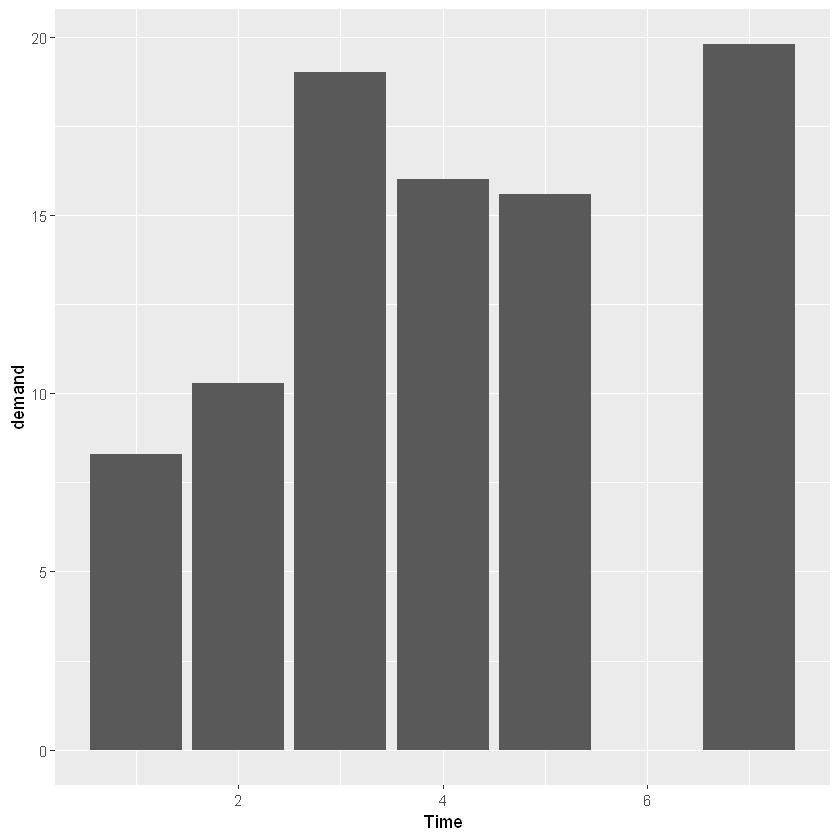

In [115]:
p = ggplot(BOD, aes(x = Time, y = demand)) + 
    geom_bar(stat = 'identity')

In [116]:
ggsave('条形图3.png', dpi = 100, plot = p, width = 6, height = 4)

In [117]:
head(pg_mean)

,group,weight
,<fct>,<dbl>
1,ctrl,5.032
2,trt1,4.661
3,trt2,5.526


In [119]:
p = ggplot(pg_mean, aes(x = group, y = weight)) + 
    geom_bar(stat = 'identity', width = 0.5)

In [120]:
ggsave('条形图4.png', dpi = 100, plot = p, width = 6, height = 4)

In [121]:
library(gcookbook)
head(cabbage_exp)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171
3,c39,d21,2.74,0.9834181,10,0.31098410
4,c52,d16,2.26,0.4452215,10,0.14079141
5,c52,d20,3.11,0.7908505,10,0.25008887
6,c52,d21,1.47,0.2110819,10,0.06674995


In [122]:
library(plyr)
ce = ddply(cabbage_exp, 'Date', transform, 
          percent_weight = Weight / sum(Weight) * 100)
head(ce)

,Cultivar,Date,Weight,sd,n,se,percent_weight
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803,58.45588
2,c52,d16,2.26,0.4452215,10,0.14079141,41.54412
3,c39,d20,2.80,0.2788867,10,0.08819171,47.37733
4,c52,d20,3.11,0.7908505,10,0.25008887,52.62267
5,c39,d21,2.74,0.9834181,10,0.31098410,65.08314
6,c52,d21,1.47,0.2110819,10,0.06674995,34.91686


In [124]:
p = ggplot(ce, aes(x = Date, y = percent_weight, fill = Cultivar)) + 
    geom_bar(stat = 'identity')

In [125]:
ggsave('百分比堆积条形图.png', dpi = 100, plot = p, width = 6, height = 4)

In [126]:
library(gcookbook)
head(cabbage_exp)

,Cultivar,Date,Weight,sd,n,se
,<fct>,<fct>,<dbl>,<dbl>,<int>,<dbl>
1,c39,d16,3.18,0.9566144,10,0.30250803
2,c39,d20,2.80,0.2788867,10,0.08819171
3,c39,d21,2.74,0.9834181,10,0.31098410
4,c52,d16,2.26,0.4452215,10,0.14079141
5,c52,d20,3.11,0.7908505,10,0.25008887
6,c52,d21,1.47,0.2110819,10,0.06674995


In [128]:
p = ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) + 
    geom_bar(position = 'dodge', stat = 'identity')

In [129]:
ggsave('簇状条形图.png', dpi = 100, plot = p, width = 6, height = 4)

In [131]:
library(RColorBrewer)
p = ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) + 
    geom_bar(position = 'dodge', stat = 'identity', colour = 'black') + 
    scale_fill_brewer(palette = 'Pastell')

Warning message in pal_name(palette, type):
"Unknown palette Pastell"


In [132]:
ggsave('簇状条形图2.png', dpi = 100, plot = p, width = 6, height = 4)

In [134]:
p = ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) + 
    geom_bar(stat = 'identity')

In [135]:
ggsave('堆积条形图.png', dpi = 100, plot = p, width = 6, height = 4)

In [137]:
p = ggplot(cabbage_exp, aes(x = Date, y = Weight, fill = Cultivar)) + 
    geom_bar(stat = 'identity') + 
    guides(fill = guide_legend(reverse = TRUE))

In [138]:
ggsave('堆积条形图2.png', dpi = 100, plot = p, width = 6, height = 4)

# geom_boxplot()

In [36]:
head(ToothGrowth)

,len,supp,dose
,<dbl>,<fct>,<dbl>
1,4.2,VC,0.5
2,11.5,VC,0.5
3,7.3,VC,0.5
4,5.8,VC,0.5
5,6.4,VC,0.5
6,10.0,VC,0.5


In [38]:
library(ggplot2)

p = ggplot(ToothGrowth, aes(x = supp, y = len)) + geom_boxplot()

In [39]:
ggsave('箱线图.png', dpi = 100, plot = p, width = 6, height = 4)

In [41]:
p = ggplot(ToothGrowth, aes(x = interaction(supp, dose), y = len)) + 
    geom_boxplot()

In [42]:
ggsave('多分组变量箱线图.png', dpi = 100, plot = p, width = 6, height = 4)

In [43]:
head(ChickWeight)

,weight,Time,Chick,Diet
,<dbl>,<dbl>,<ord>,<fct>
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1


In [45]:
p = ggplot(ChickWeight, aes(x = Time, y = weight)) + 
    geom_boxplot(aes(group = Time))

In [46]:
ggsave('分组变量箱线图.png', dpi = 100, plot = p, width = 6, height = 4)

# geom_rug()

In [47]:
head(faithful)

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55


In [50]:
library(ggplot2)

p = ggplot(faithful, aes(x = eruptions, y = waiting)) + 
    geom_point() + geom_rug()

In [51]:
ggsave('点图添加边际地毯.png', dpi = 100, plot = p, width = 6, height = 4)

In [53]:
p = ggplot(faithful, aes(x = eruptions, y = waiting)) + 
    geom_point() + 
    geom_rug(position = 'jitter', size = .2)

In [54]:
ggsave('点图添加边际地毯2.png', dpi = 100, plot = p, width = 6, height = 4)

# qplot()

In [58]:
myfun = function(xvar){
    1 / (1 + exp(-xvar + 10))
}

library(ggplot2)
p = ggplot(data.frame(x = c(0, 20)), aes(x = x)) + 
    stat_function(fun = myfun, geom = 'line')

In [59]:
ggsave('函数图像.png', dpi = 100, plot = p, width = 6, height = 4)